Reading data from datasets/Gene-Antibiotic Class.csv...
Data preview:
                   Unnamed: 0        Antibiotitics Class       Unnamed: 2  \
0                        Gene  Aminocoumarin antibiotics  Aminoglycosides   
1  AAC(6')-Ic,f,g,h,j,k,l,r-z                          0               32   
2                  AcrAB-TolC                          0                0   
3                  AcrAD-TolC                          0               33   
4                  AcrEF-TolC                          0                0   

      Unnamed: 3                           Unnamed: 4      Unnamed: 5  \
0  Bicyclomycins  Carbapenems, Penams, Cephalosporins  Cephalosporins   
1              0                                    0               0   
2              0                                    0               0   
3              0                                    0               0   
4              0                                    0               0   

                            

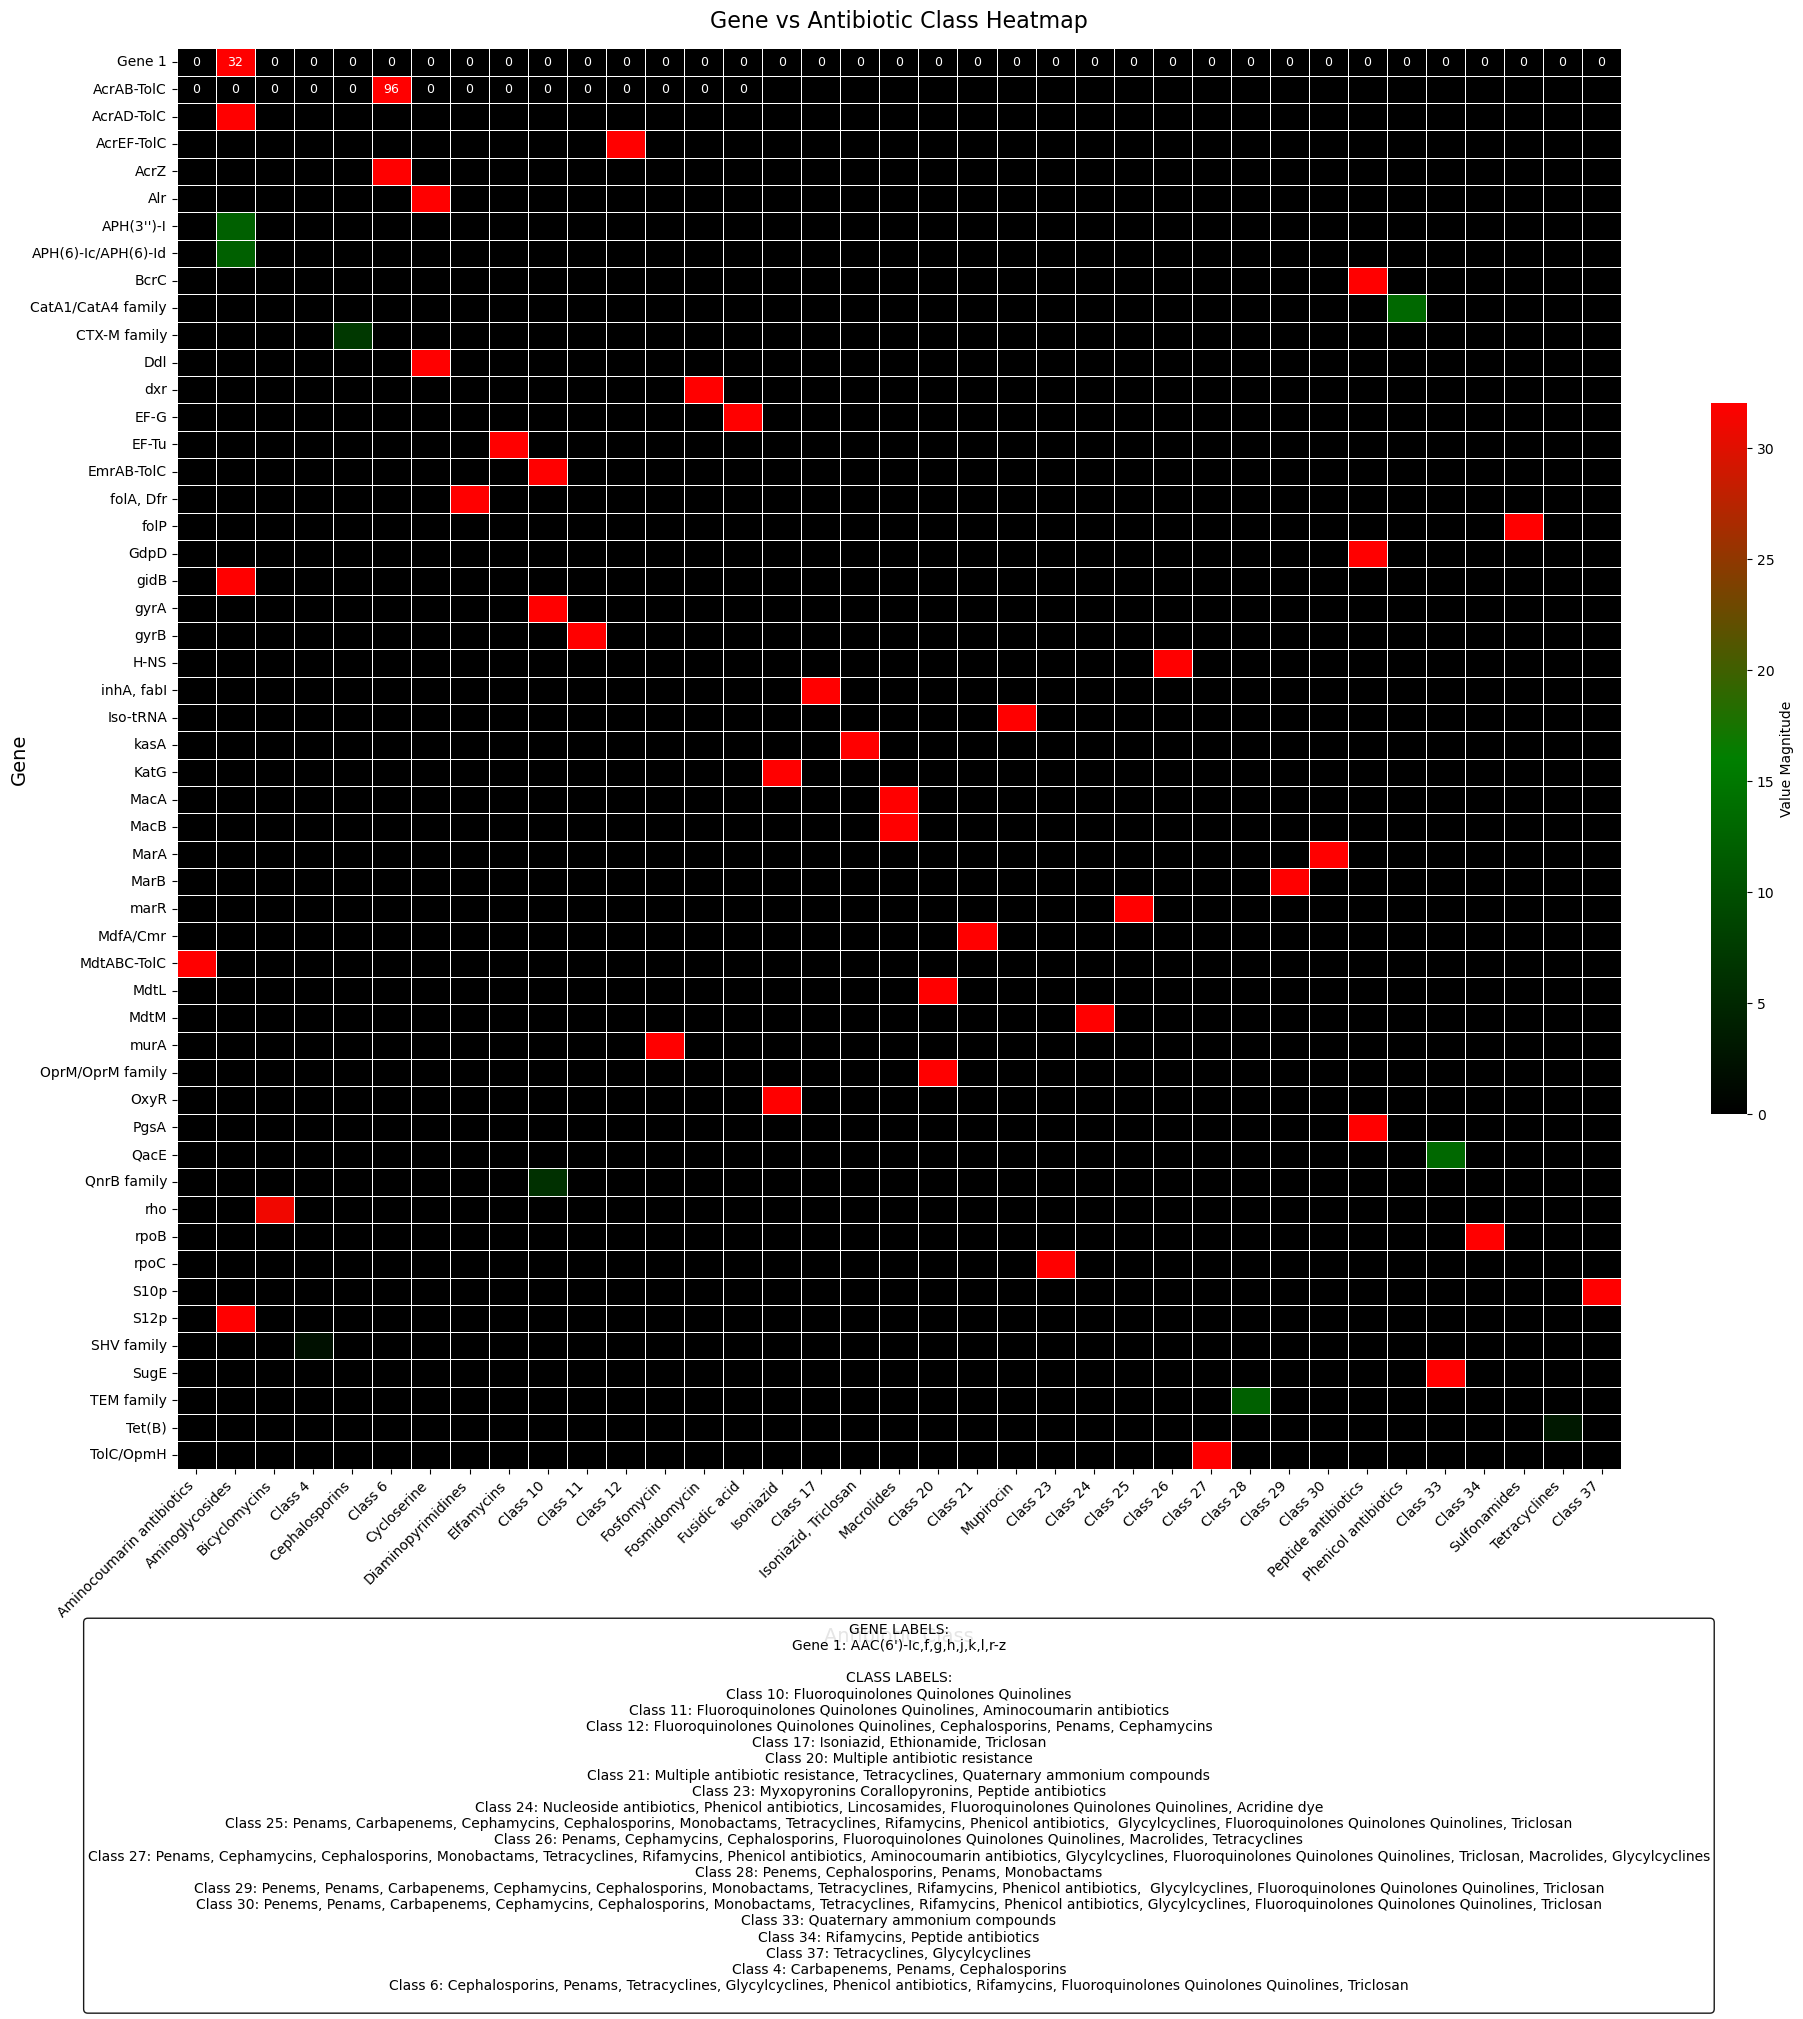

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
input_file = "datasets/Gene-Antibiotic Class.csv"
output_heatmap = "GeneAntibiotic_Class_heatmap.png"
output_reference = "GeneAntibiotic_label_reference.txt"

# Data acquisition and preprocessing
print(f"Reading data from {input_file}...")
data = pd.read_csv(input_file)

# Examine data structure
print("Data preview:")
print(data.head())

# Data has a specific structure with first row containing antibiotic classes
# Extract those classes first to use as column headers
antibiotic_classes = data.iloc[0, 1:].tolist()
class_names = [str(cls) for cls in antibiotic_classes]

# Extract gene names from first column (excluding header row)
genes = data.iloc[1:, 0].tolist()

# Extract the numeric data (excluding the header row and first column)
matrix_data = data.iloc[1:, 1:].astype(float).values

print(f"Extracted {len(genes)} genes and {len(class_names)} antibiotic classes")
print(f"Matrix shape: {matrix_data.shape}")

# Check for any data issues
print(f"Data contains {np.count_nonzero(matrix_data)} non-zero values out of {matrix_data.size}")
print(f"Unique values in data: {np.unique(matrix_data)}")

# Handle long gene names by creating shortened names if needed
gene_label_mapping = {}
for idx, gene in enumerate(genes):
    if len(str(gene)) > 25:  # Threshold for truncation
        shortened = f"Gene {idx+1}"  # Numeric identifier
        gene_label_mapping[shortened] = str(gene)
        genes[idx] = shortened

# Handle long class names by creating shortened names if needed
class_label_mapping = {}
for idx, cls in enumerate(class_names):
    if len(str(cls)) > 25:  # Threshold for truncation
        shortened = f"Class {idx+1}"  # Numeric identifier
        class_label_mapping[shortened] = str(cls)
        class_names[idx] = shortened

# Figure dimensioning with optimization for data volume
fig_width = max(20, len(class_names) * 0.5)
fig_height = max(14, len(genes) * 0.4)

# Create the heatmap visualization
print("\nGenerating heatmap visualization...")
plt.figure(figsize=(fig_width, fig_height))

# Convert data to DataFrame for heatmap generation
heatmap_df = pd.DataFrame(matrix_data, index=genes, columns=class_names)

# Custom color gradient: black for zero, green to red for increasing values
# Similar to the example script provided
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Generate the heatmap
heatmap = sns.heatmap(
    heatmap_df,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='g',
    annot_kws={"size": 9},
    robust=True,
    cbar_kws={"shrink": 0.5, "label": "Value Magnitude"}
)

# Typography configuration
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Title and labels
plt.title("Gene vs Antibiotic Class Heatmap", fontsize=16, pad=15)
plt.xlabel('Antibiotic Class', fontsize=14, labelpad=5)
plt.ylabel('Gene', fontsize=14, labelpad=1)

# Apply tight layout but maintain space at bottom for legend if needed
plt.tight_layout(pad=1.0, rect=[0, 0.2, 1, 1] if (gene_label_mapping or class_label_mapping) else [0, 0, 1, 1])

# Add legend for truncated labels if any exist
if gene_label_mapping or class_label_mapping:
    legend_text = ""
    
    if gene_label_mapping:
        legend_text += "GENE LABELS:\n"
        for short, full in sorted(gene_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    if class_label_mapping:
        if legend_text:
            legend_text += "\n"
        legend_text += "CLASS LABELS:\n"
        for short, full in sorted(class_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    # Create a new axes for the legend, positioning it exactly centered below the heatmap
    fig = plt.gcf()
    # Get the current axes (the heatmap)
    hm_ax = plt.gca()
    
    # Calculate the legend box position
    # Use the heatmap boundaries to determine where to place the legend
    hm_pos = hm_ax.get_position()
    legend_width = hm_pos.width * 0.8  # 80% of heatmap width
    legend_height = 0.15  # Fixed height for legend
    
    # Create the legend axes positioned below the heatmap, perfectly centered
    legend_ax = fig.add_axes([
        hm_pos.x0 + (hm_pos.width - legend_width) / 2,  # Centered x position
        0.05,  # Fixed bottom position
        legend_width,
        legend_height
    ])
    
    # Remove axis ticks and spines for the legend box
    legend_ax.set_xticks([])
    legend_ax.set_yticks([])
    for spine in legend_ax.spines.values():
        spine.set_visible(False)
    
    # Add text to the legend axes
    legend_ax.text(0.5, 0.5, legend_text,
                   ha='center', va='center', 
                   fontsize=10,
                   multialignment='center',
                   transform=legend_ax.transAxes,
                   bbox={"facecolor":"white", "alpha":0.9, "pad":3, "boxstyle":"round,pad=0.3"})

# Save the heatmap
plt.savefig(output_heatmap, dpi=300, bbox_inches='tight', pad_inches=0.3)
print(f"Heatmap saved to {output_heatmap} with resolution 300 DPI")

# Generate auxiliary legend file for reference
with open(output_reference, 'w') as f:
    f.write("GENE-ANTIBIOTIC CLASS LABEL REFERENCE\n")
    f.write("=====================================\n\n")
    
    if gene_label_mapping:
        f.write("GENE LABELS:\n")
        for short, full in sorted(gene_label_mapping.items()):
            f.write(f"{short}: {full}\n")
    
    if class_label_mapping:
        f.write("\nCLASS LABELS:\n")
        for short, full in sorted(class_label_mapping.items()):
            f.write(f"{short}: {full}\n")
    
    f.write("\nSTATISTICS:\n")
    f.write(f"Total genes: {len(genes)}\n")
    f.write(f"Total antibiotic classes: {len(class_names)}\n")
    f.write(f"Non-zero values: {np.count_nonzero(matrix_data)}\n")
    f.write(f"Percentage of non-zero values: {np.count_nonzero(matrix_data) / matrix_data.size * 100:.2f}%\n")
    f.write(f"Value range: {np.min(matrix_data)} to {np.max(matrix_data)}\n")

print(f"Label reference file generated: {output_reference}")
print("\nHeatmap generation complete.")

Reading data from datasets/Gene-Antibiotic Class.csv...
Data preview:
                   Unnamed: 0        Antibiotitics Class       Unnamed: 2  \
0                        Gene  Aminocoumarin antibiotics  Aminoglycosides   
1  AAC(6')-Ic,f,g,h,j,k,l,r-z                          0               32   
2                  AcrAB-TolC                          0                0   
3                  AcrAD-TolC                          0               33   
4                  AcrEF-TolC                          0                0   

      Unnamed: 3                           Unnamed: 4      Unnamed: 5  \
0  Bicyclomycins  Carbapenems, Penams, Cephalosporins  Cephalosporins   
1              0                                    0               0   
2              0                                    0               0   
3              0                                    0               0   
4              0                                    0               0   

                            

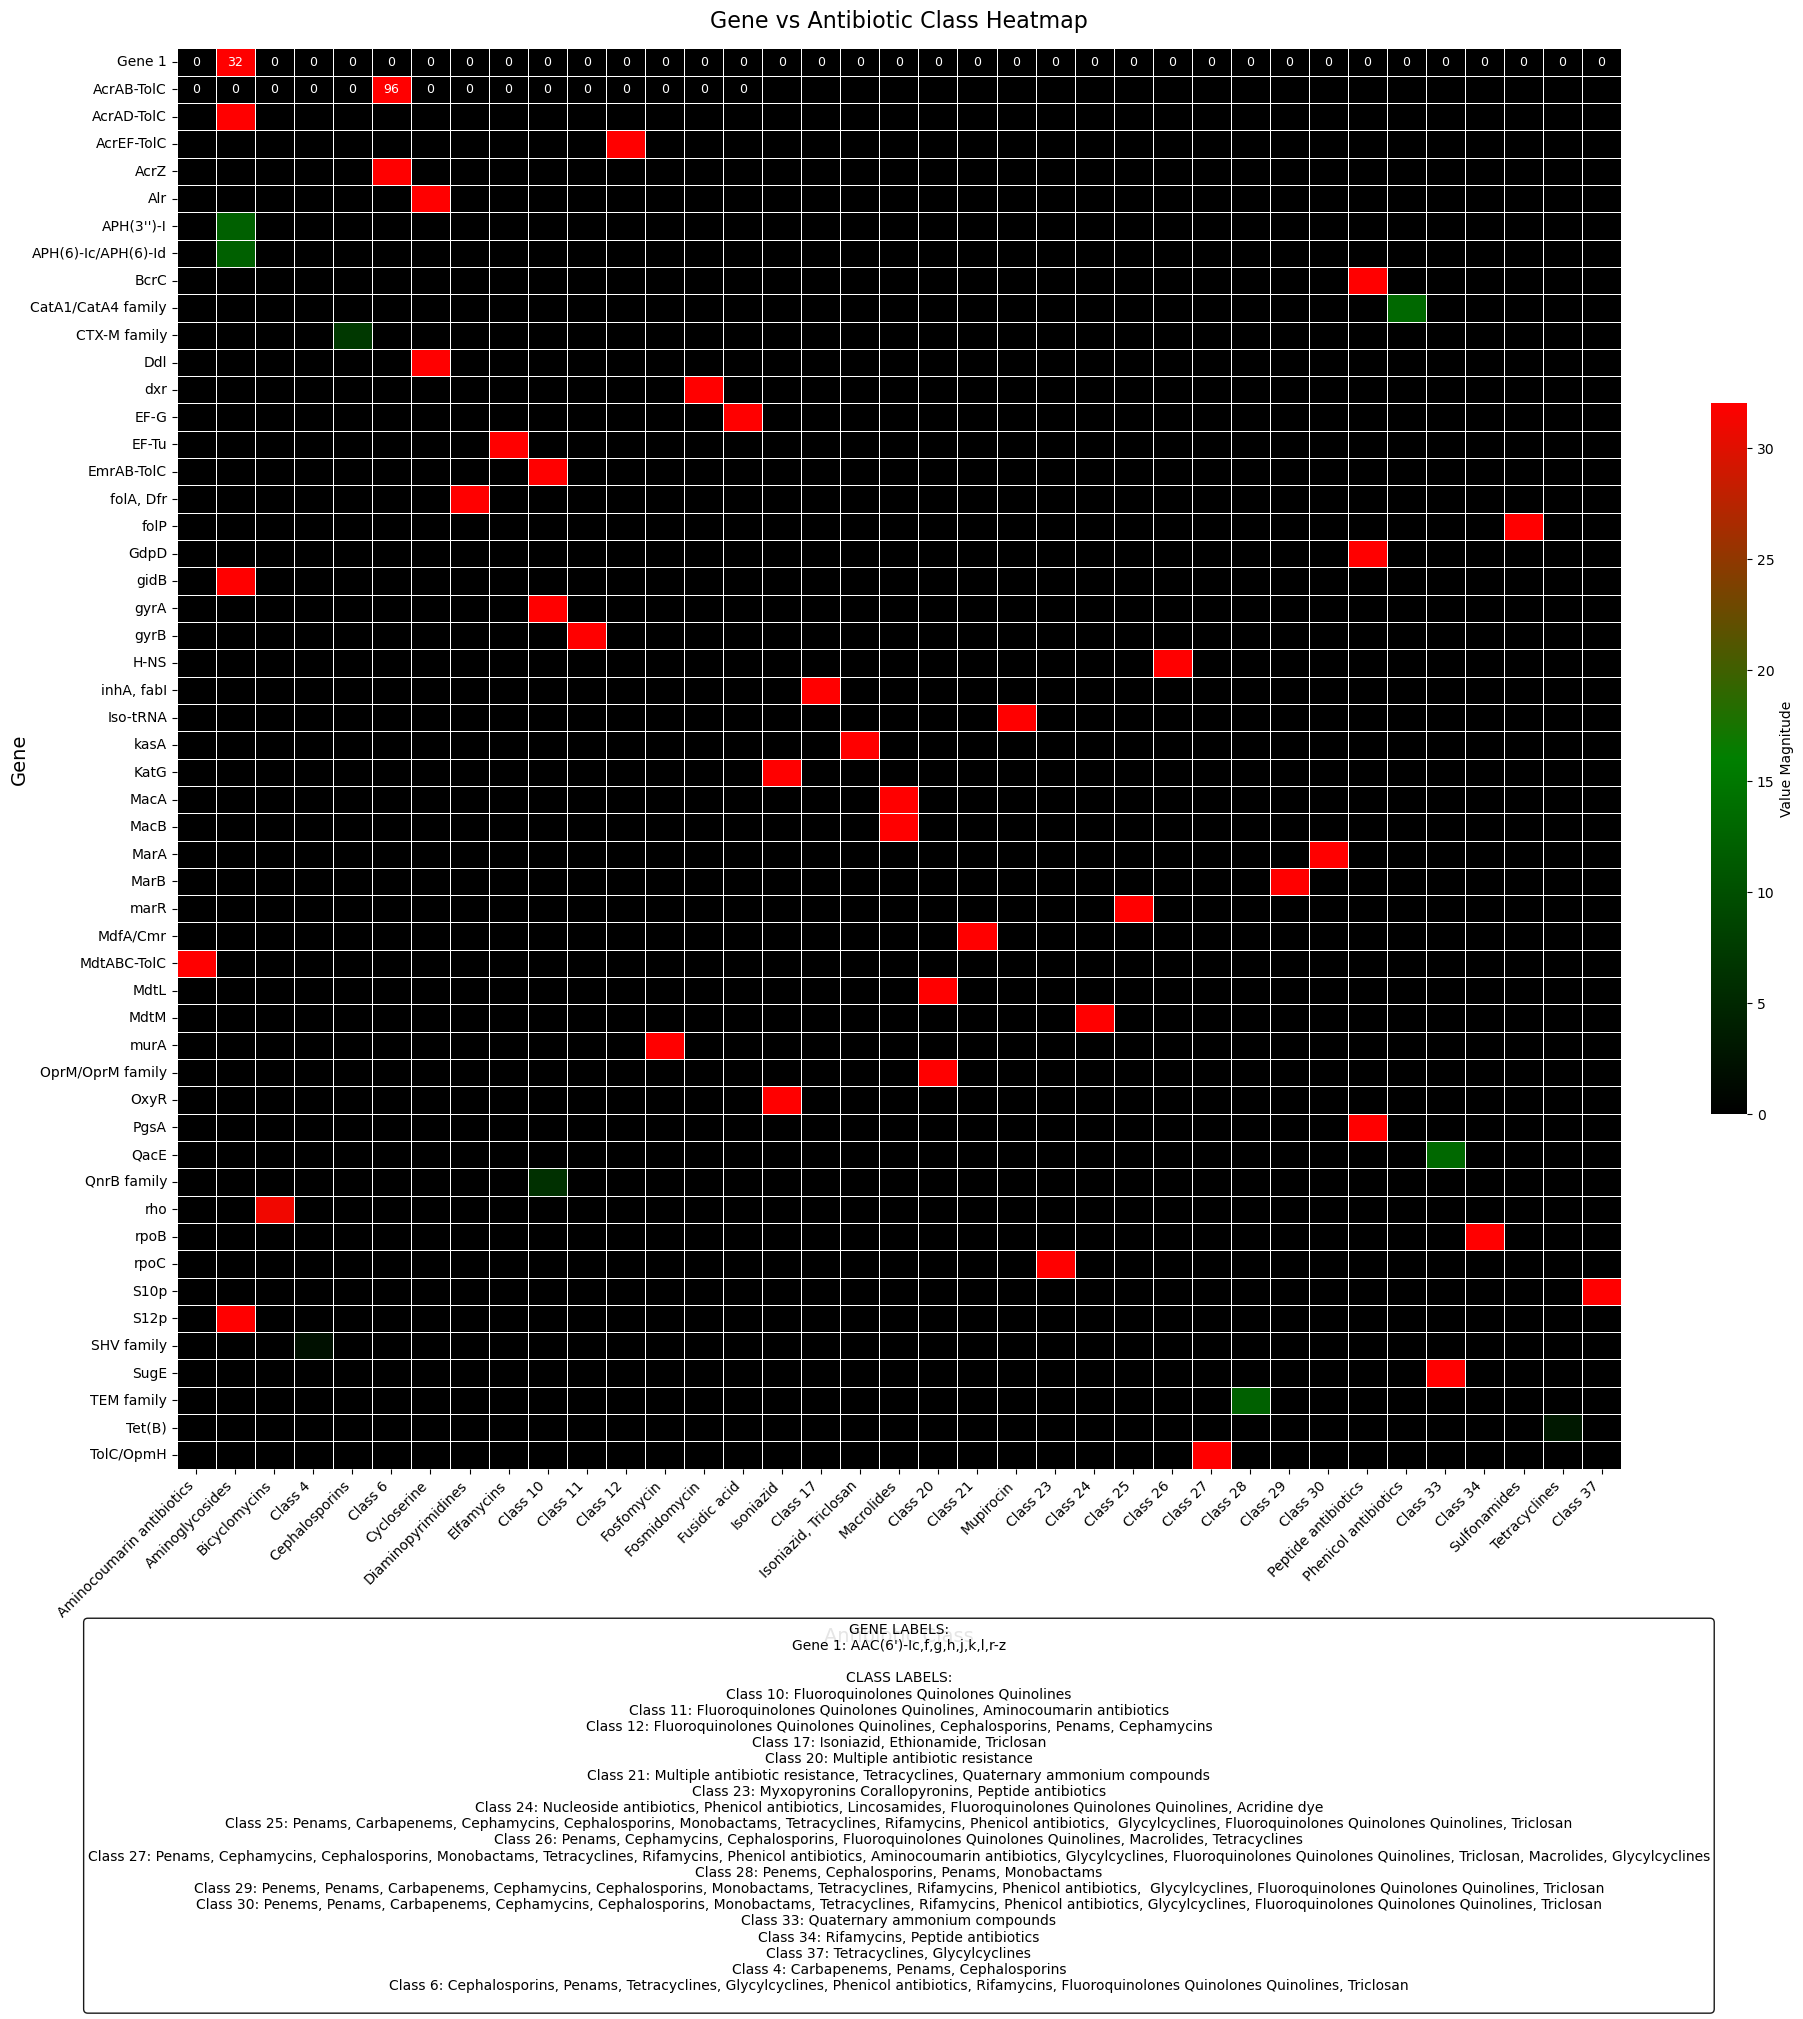

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
input_file = "datasets/Gene-Antibiotic Class.csv"
output_heatmap = "GeneAntibiotic_Class_heatmap.png"
output_reference = "GeneAntibiotic_label_reference.txt"
output_matrix_csv = "GeneAntibiotic_Class_matrix.csv"  # New output file for the matrix data

# Data acquisition and preprocessing
print(f"Reading data from {input_file}...")
data = pd.read_csv(input_file)

# Examine data structure
print("Data preview:")
print(data.head())

# Data has a specific structure with first row containing antibiotic classes
# Extract those classes first to use as column headers
antibiotic_classes = data.iloc[0, 1:].tolist()
class_names = [str(cls) for cls in antibiotic_classes]

# Extract gene names from first column (excluding header row)
genes = data.iloc[1:, 0].tolist()

# Extract the numeric data (excluding the header row and first column)
matrix_data = data.iloc[1:, 1:].astype(float).values

print(f"Extracted {len(genes)} genes and {len(class_names)} antibiotic classes")
print(f"Matrix shape: {matrix_data.shape}")

# Check for any data issues
print(f"Data contains {np.count_nonzero(matrix_data)} non-zero values out of {matrix_data.size}")
print(f"Unique values in data: {np.unique(matrix_data)}")

# Handle long gene names by creating shortened names if needed
gene_label_mapping = {}
for idx, gene in enumerate(genes):
    if len(str(gene)) > 25:  # Threshold for truncation
        shortened = f"Gene {idx+1}"  # Numeric identifier
        gene_label_mapping[shortened] = str(gene)
        genes[idx] = shortened

# Handle long class names by creating shortened names if needed
class_label_mapping = {}
for idx, cls in enumerate(class_names):
    if len(str(cls)) > 25:  # Threshold for truncation
        shortened = f"Class {idx+1}"  # Numeric identifier
        class_label_mapping[shortened] = str(cls)
        class_names[idx] = shortened

# Figure dimensioning with optimization for data volume
fig_width = max(20, len(class_names) * 0.5)
fig_height = max(14, len(genes) * 0.4)

# Create the heatmap visualization
print("\nGenerating heatmap visualization...")
plt.figure(figsize=(fig_width, fig_height))

# Convert data to DataFrame for heatmap generation
heatmap_df = pd.DataFrame(matrix_data, index=genes, columns=class_names)

# Custom color gradient: black for zero, green to red for increasing values
# Similar to the example script provided
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Generate the heatmap
heatmap = sns.heatmap(
    heatmap_df,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='g',
    annot_kws={"size": 9},
    robust=True,
    cbar_kws={"shrink": 0.5, "label": "Value Magnitude"}
)

# Typography configuration
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Title and labels
plt.title("Gene vs Antibiotic Class Heatmap", fontsize=16, pad=15)
plt.xlabel('Antibiotic Class', fontsize=14, labelpad=5)
plt.ylabel('Gene', fontsize=14, labelpad=1)

# Apply tight layout but maintain space at bottom for legend if needed
plt.tight_layout(pad=1.0, rect=[0, 0.2, 1, 1] if (gene_label_mapping or class_label_mapping) else [0, 0, 1, 1])

# Add legend for truncated labels if any exist
if gene_label_mapping or class_label_mapping:
    legend_text = ""
    
    if gene_label_mapping:
        legend_text += "GENE LABELS:\n"
        for short, full in sorted(gene_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    if class_label_mapping:
        if legend_text:
            legend_text += "\n"
        legend_text += "CLASS LABELS:\n"
        for short, full in sorted(class_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    # Create a new axes for the legend, positioning it exactly centered below the heatmap
    fig = plt.gcf()
    # Get the current axes (the heatmap)
    hm_ax = plt.gca()
    
    # Calculate the legend box position
    # Use the heatmap boundaries to determine where to place the legend
    hm_pos = hm_ax.get_position()
    legend_width = hm_pos.width * 0.8  # 80% of heatmap width
    legend_height = 0.15  # Fixed height for legend
    
    # Create the legend axes positioned below the heatmap, perfectly centered
    legend_ax = fig.add_axes([
        hm_pos.x0 + (hm_pos.width - legend_width) / 2,  # Centered x position
        0.05,  # Fixed bottom position
        legend_width,
        legend_height
    ])
    
    # Remove axis ticks and spines for the legend box
    legend_ax.set_xticks([])
    legend_ax.set_yticks([])
    for spine in legend_ax.spines.values():
        spine.set_visible(False)
    
    # Add text to the legend axes
    legend_ax.text(0.5, 0.5, legend_text,
                   ha='center', va='center', 
                   fontsize=10,
                   multialignment='center',
                   transform=legend_ax.transAxes,
                   bbox={"facecolor":"white", "alpha":0.9, "pad":3, "boxstyle":"round,pad=0.3"})

# Save the heatmap
plt.savefig(output_heatmap, dpi=300, bbox_inches='tight', pad_inches=0.3)
print(f"Heatmap saved to {output_heatmap} with resolution 300 DPI")

# Generate auxiliary legend file for reference
with open(output_reference, 'w') as f:
    f.write("GENE-ANTIBIOTIC CLASS LABEL REFERENCE\n")
    f.write("=====================================\n\n")
    
    if gene_label_mapping:
        f.write("GENE LABELS:\n")
        for short, full in sorted(gene_label_mapping.items()):
            f.write(f"{short}: {full}\n")
    
    if class_label_mapping:
        f.write("\nCLASS LABELS:\n")
        for short, full in sorted(class_label_mapping.items()):
            f.write(f"{short}: {full}\n")
    
    f.write("\nSTATISTICS:\n")
    f.write(f"Total genes: {len(genes)}\n")
    f.write(f"Total antibiotic classes: {len(class_names)}\n")
    f.write(f"Non-zero values: {np.count_nonzero(matrix_data)}\n")
    f.write(f"Percentage of non-zero values: {np.count_nonzero(matrix_data) / matrix_data.size * 100:.2f}%\n")
    f.write(f"Value range: {np.min(matrix_data)} to {np.max(matrix_data)}\n")

# Export the heatmap data matrix to CSV for further analysis
print("\nExporting heatmap matrix data to CSV...")
heatmap_df.to_csv(output_matrix_csv)
print(f"Matrix data exported to {output_matrix_csv}")

print(f"Label reference file generated: {output_reference}")
print("\nHeatmap generation complete.")